In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Type_of_Renewable_Energy.csv")

# Preview the dataset
print("Dataset Preview:")
print(data.head())

# Display dataset information
print("\nDataset Information:")
print(data.info())

# Display basic statistics of the dataset
print("\nDataset Statistics:")
print(data.describe())

Dataset Preview:
   Type_of_Renewable_Energy  Installed_Capacity_MW  Energy_Production_MWh  \
0                         4              93.423205            103853.2206   
1                         4             590.468942            190223.0649   
2                         1             625.951142            266023.4824   
3                         1             779.998728            487039.5296   
4                         3             242.106837            482815.0856   

   Energy_Consumption_MWh  Energy_Storage_Capacity_MWh  \
0             248708.4892                  2953.248771   
1             166104.1642                  5305.174042   
2             424114.6308                  2620.192622   
3             308337.7316                  1925.250307   
4             360437.7705                  3948.945383   

   Storage_Efficiency_Percentage  Grid_Integration_Level  \
0                      89.887562                       4   
1                      84.403343                   

In [4]:
# Remove duplicates if any
data.drop_duplicates(inplace=True)

# Standardize column names (optional but helpful for consistency)
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

print("\nData after basic cleaning:")
print(data.head())


Data after basic cleaning:
   type_of_renewable_energy  installed_capacity_mw  energy_production_mwh  \
0                         4              93.423205            103853.2206   
1                         4             590.468942            190223.0649   
2                         1             625.951142            266023.4824   
3                         1             779.998728            487039.5296   
4                         3             242.106837            482815.0856   

   energy_consumption_mwh  energy_storage_capacity_mwh  \
0             248708.4892                  2953.248771   
1             166104.1642                  5305.174042   
2             424114.6308                  2620.192622   
3             308337.7316                  1925.250307   
4             360437.7705                  3948.945383   

   storage_efficiency_percentage  grid_integration_level  \
0                      89.887562                       4   
1                      84.403343        

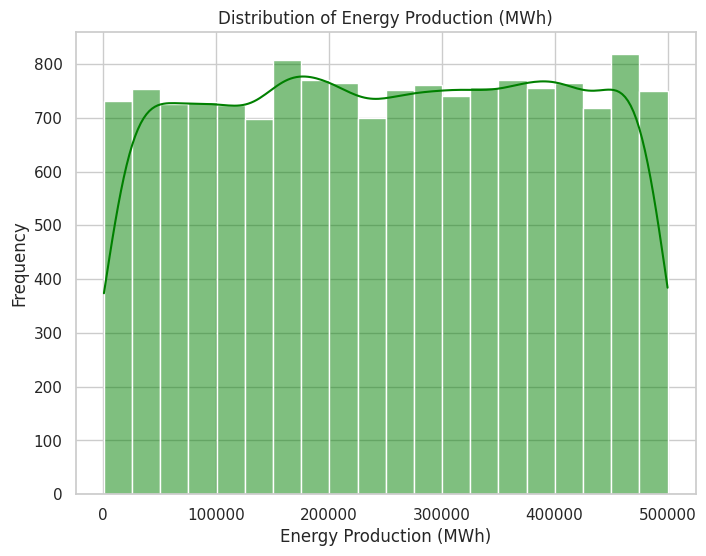

In [5]:
# Distribution of the Dependent Variable
sns.set(style="whitegrid")

# Visualization 1: Distribution of the Dependent Variable
plt.figure(figsize=(8, 6))
sns.histplot(data['energy_production_mwh'], kde=True, bins=20, color='green')  # Updated column name
plt.title('Distribution of Energy Production (MWh)')  # Updated title
plt.xlabel('Energy Production (MWh)')  # Updated x-axis label
plt.ylabel('Frequency')
plt.show()

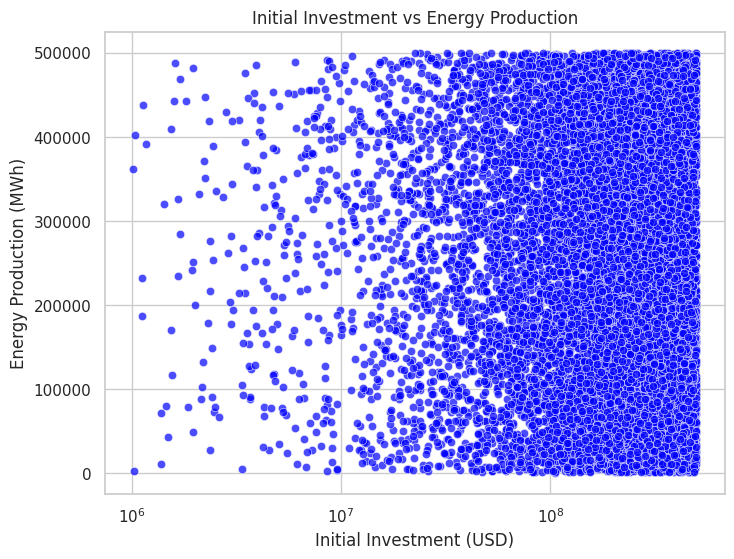

In [6]:
# Initial Investment vs Energy Production
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='initial_investment_usd',  # Updated independent variable
    y='energy_production_mwh',   # Updated dependent variable
    data=data,
    alpha=0.7, color='blue'
)
plt.title('Initial Investment vs Energy Production')  # Updated title
plt.xlabel('Initial Investment (USD)')  # Updated x-axis label
plt.ylabel('Energy Production (MWh)')  # Updated y-axis label
plt.xscale('log')  # Log scale for better visualization of variation
plt.show()

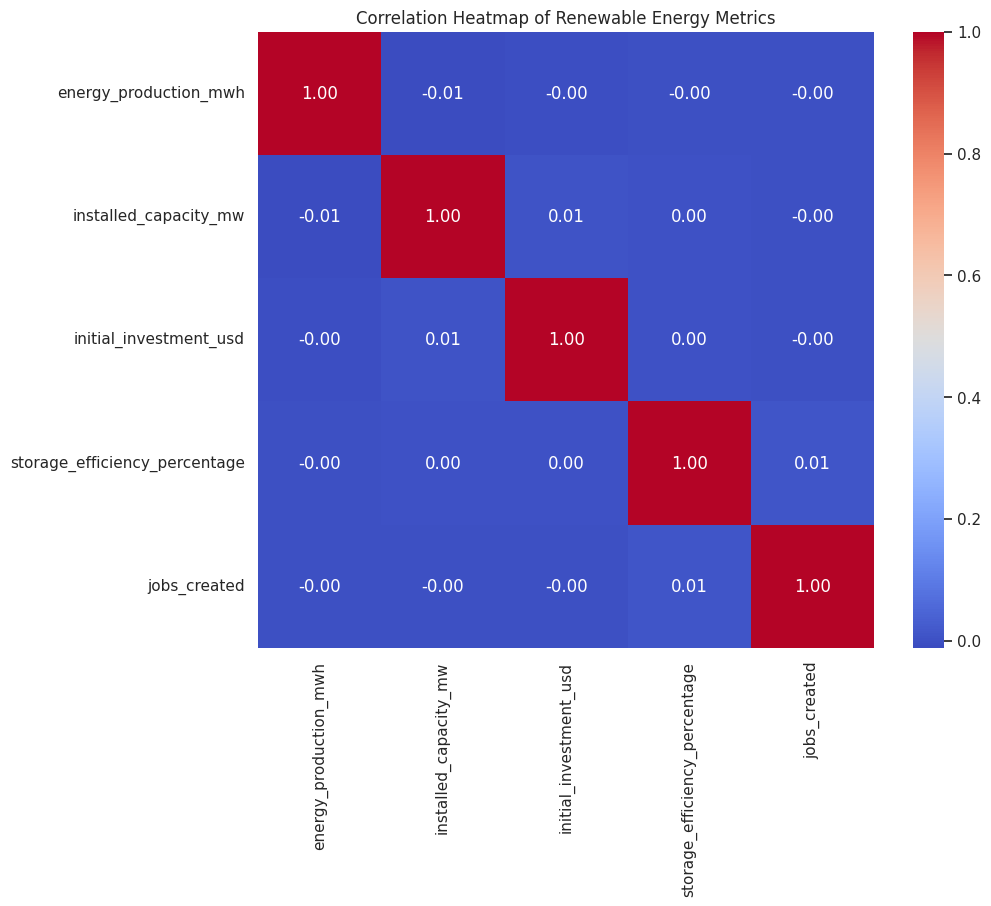

In [7]:
# Correlation Heatmap of Relevant Variables
relevant_columns = [
    'energy_production_mwh',  # Dependent variable
    'installed_capacity_mw',  # Independent variable
    'initial_investment_usd',  # Independent variable
    'storage_efficiency_percentage',  # Independent variable
    'jobs_created'  # Independent variable
]

plt.figure(figsize=(10, 8))
correlation_matrix = data[relevant_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Renewable Energy Metrics')  # Updated title
plt.show()

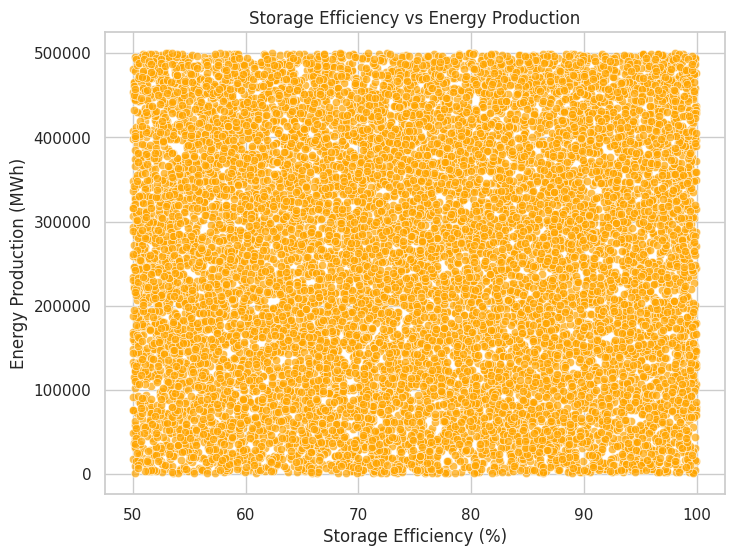

In [8]:
# Storage Efficiency vs Energy Production
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='storage_efficiency_percentage',  # Updated independent variable
    y='energy_production_mwh',         # Updated dependent variable
    data=data,
    alpha=0.7, color='orange'
)
plt.title('Storage Efficiency vs Energy Production')  # Updated title
plt.xlabel('Storage Efficiency (%)')  # Updated x-axis label
plt.ylabel('Energy Production (MWh)')  # Updated y-axis label
plt.show()

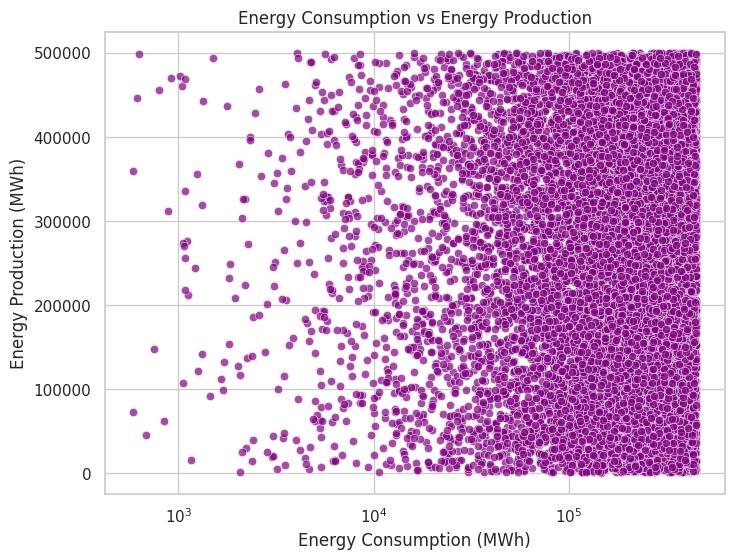

In [9]:
# Energy Consumption vs Energy Production
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='energy_consumption_mwh',  # Updated independent variable
    y='energy_production_mwh',   # Updated dependent variable
    data=data,
    alpha=0.7, color='purple'
)
plt.title('Energy Consumption vs Energy Production')  # Updated title
plt.xlabel('Energy Consumption (MWh)')  # Updated x-axis label
plt.ylabel('Energy Production (MWh)')  # Updated y-axis label
plt.xscale('log')  # Log scale for better visualization of variation
plt.show()

In [10]:
# Extract relevant data
X = data[['installed_capacity_mw', 'energy_consumption_mwh',
          'energy_storage_capacity_mwh', 'storage_efficiency_percentage',
          'initial_investment_usd']].values  # Independent variables
y = data['energy_production_mwh'].values  # Dependent variable

# Handle missing values (drop rows with NaN for simplicity)
mask = ~np.isnan(X).any(axis=1) & ~np.isnan(y)
X = X[mask]
y = y[mask]

# Normalize features for better optimization performance
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std

# Add a bias term (intercept)
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Split the data into train and test sets (80% train, 20% test)
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Initialize weights
weights = np.zeros(X_train.shape[1])

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# Gradient Descent
for epoch in range(epochs):
    predictions = X_train.dot(weights)
    errors = predictions - y_train
    gradient = (1 / len(y_train)) * X_train.T.dot(errors)
    weights -= learning_rate * gradient

# Prediction function
def predict(X, weights):
    return X.dot(weights)

# Evaluate on the train and test sets
y_train_pred = predict(X_train, weights)
y_test_pred = predict(X_test, weights)

# Metrics
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r_squared(y_train, y_train_pred)
test_r2 = r_squared(y_test, y_test_pred)

# Print results
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

# Feature Coefficients
feature_names = ['Intercept', 'Installed_Capacity_MW', 'Energy_Consumption_MWh',
                 'Energy_Storage_Capacity_MWh', 'Storage_Efficiency_Percentage',
                 'Initial_Investment_USD']
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': weights
})
print("\nFeature Coefficients:")
print(coefficients)

Train MSE: 20860614275.270493
Test MSE: 20425203250.283222
Train R-squared: 0.00010845205988474493
Test R-squared: -0.000808023246085865

Feature Coefficients:
                         Feature    Coefficient
0                      Intercept  252003.969674
1          Installed_Capacity_MW    -874.246594
2         Energy_Consumption_MWh    1181.022012
3    Energy_Storage_Capacity_MWh      38.935227
4  Storage_Efficiency_Percentage      66.335208
5         Initial_Investment_USD    -320.132600


In [11]:
from sklearn.linear_model import LinearRegression

# Model 1: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_test_pred_linear = linear_model.predict(X_test)

print("Linear Regression model trained.")

Linear Regression model trained.


In [12]:
from sklearn.ensemble import RandomForestRegressor

# Model 2: Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_test_pred_rf = random_forest_model.predict(X_test)

print("Random Forest Regressor model trained.")

Random Forest Regressor model trained.


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation Metrics
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Evaluate Model 1: Linear Regression
mae_linear, rmse_linear, r2_linear = evaluate_model(y_test, y_test_pred_linear)

# Evaluate Model 2: Random Forest Regressor
mae_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_test_pred_rf)

# Print Results
print("Model 1: Linear Regression")
print(f"MAE: {mae_linear:.4f}, RMSE: {rmse_linear:.4f}, R-squared: {r2_linear:.4f}")

print("\nModel 2: Random Forest Regressor")
print(f"MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, R-squared: {r2_rf:.4f}")

# Compare and Identify the Better Model
if r2_rf > r2_linear:
    print("\nConclusion: Random Forest Regressor performed better based on R-squared value.")
else:
    print("\nConclusion: Linear Regression performed better based on R-squared value.")

Model 1: Linear Regression
MAE: 123528.8247, RMSE: 142916.4664, R-squared: -0.0008

Model 2: Random Forest Regressor
MAE: 125225.2334, RMSE: 145886.0923, R-squared: -0.0428

Conclusion: Linear Regression performed better based on R-squared value.


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Hyperparameters for Linear Regression (Ridge is used for regularization)
param_grid_linear = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}  # Regularization strength

# Use Ridge Regression as it allows regularization
ridge_model = Ridge()

# Perform GridSearchCV
grid_search_linear = GridSearchCV(estimator=ridge_model, param_grid=param_grid_linear, cv=5, scoring='r2')
grid_search_linear.fit(X_train, y_train)

# Best hyperparameters for Linear Regression
best_params_linear = grid_search_linear.best_params_
print("Best hyperparameters for Linear Regression (Ridge):", best_params_linear)

Best hyperparameters for Linear Regression (Ridge): {'alpha': 100.0}


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters for Random Forest
param_dist_rf = {
    'n_estimators': [10],  # Number of trees
    'max_depth': [10],  # Maximum depth of the tree
    'min_samples_split': [2],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1],  # Minimum number of samples required to be at a leaf node
}

# RandomizedSearchCV for Random Forest
rf_model = RandomForestRegressor(random_state=42)
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf, n_iter=50, cv=5, random_state=42, scoring='r2')
random_search_rf.fit(X_train, y_train)

# Best hyperparameters for Random Forest
best_params_rf = random_search_rf.best_params_
print("Best hyperparameters for Random Forest:", best_params_rf)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best hyperparameters for Random Forest: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}


In [16]:
# Summarize the best hyperparameters for both models
print("Hyperparameter Optimization Results:")
print(f"Model 1 (Ridge Regression): Best Parameters: {best_params_linear}")
print(f"Model 2 (Random Forest Regressor): Best Parameters: {best_params_rf}")

Hyperparameter Optimization Results:
Model 1 (Ridge Regression): Best Parameters: {'alpha': 100.0}
Model 2 (Random Forest Regressor): Best Parameters: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}


In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

# Model: Ridge Regression with optimal hyperparameters from previous step
ridge_model = Ridge(alpha=best_params_linear['alpha'])

# Perform Recursive Feature Elimination (RFE)
rfe_linear = RFE(estimator=ridge_model, n_features_to_select=3)  # Select top 3 features for demonstration
rfe_linear.fit(X_train, y_train)

# Identify selected features
selected_features_linear = rfe_linear.support_  # Boolean mask of selected features
feature_names = ['gdp_per_capita',
                 'primary_energy_consumption_per_capita_(kwh/person)',
                 'low-carbon_electricity_(%_electricity)',
                 'electricity_from_renewables_(twh)']
selected_feature_names_linear = [feature for feature, selected in zip(feature_names, selected_features_linear) if selected]

print("Best features for Linear Regression (Ridge):", selected_feature_names_linear)

Best features for Linear Regression (Ridge): ['primary_energy_consumption_per_capita_(kwh/person)', 'low-carbon_electricity_(%_electricity)']


In [18]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# Model: Random Forest Regressor with optimal hyperparameters from previous step
rf_model = RandomForestRegressor(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    random_state=42
)

# Fit the model
rf_model.fit(X_train, y_train)

# Perform feature selection based on importance scores
sfm_rf = SelectFromModel(rf_model, threshold="median")  # Select features with importance above the median
sfm_rf.fit(X_train, y_train)

# Identify selected features
selected_features_rf = sfm_rf.get_support()  # Boolean mask of selected features
selected_feature_names_rf = [feature for feature, selected in zip(feature_names, selected_features_rf) if selected]

print("Best features for Random Forest Regressor:", selected_feature_names_rf)

Best features for Random Forest Regressor: ['electricity_from_renewables_(twh)']


In [19]:
# Convert the selected feature names to indices
selected_feature_indices_rf = [feature_names.index(feature) for feature in selected_feature_names_rf]

# Use the indices to select features from X_train and X_test
X_train_best_features = X_train[:, selected_feature_indices_rf]
X_test_best_features = X_test[:, selected_feature_indices_rf]

# Rebuild the Random Forest model with the best hyperparameters
final_rf_model = RandomForestRegressor(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    random_state=42
)

# Train the final model
final_rf_model.fit(X_train_best_features, y_train)

# Predict on the test set
y_test_pred_final = final_rf_model.predict(X_test_best_features)

# Evaluate the final model's performance
mae_final = mean_absolute_error(y_test, y_test_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_test_pred_final))
r2_final = r2_score(y_test, y_test_pred_final)

# Print the results
print("Final Model Performance with Selected Features:")
print(f"MAE: {mae_final:.4f}, RMSE: {rmse_final:.4f}, R-squared: {r2_final:.4f}")

# Compare with the original Random Forest model
print("\nComparison with Original Random Forest Model:")
print(f"Original MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, R-squared: {r2_rf:.4f}")
print(f"Final MAE: {mae_final:.4f}, RMSE: {rmse_final:.4f}, R-squared: {r2_final:.4f}")

if r2_final > r2_rf:
    print("\nConclusion: The final model with selected features and optimized hyperparameters performed better.")
else:
    print("\nConclusion: The final model did not perform better than the original Random Forest model.")

Final Model Performance with Selected Features:
MAE: 123927.8289, RMSE: 143623.3293, R-squared: -0.0107

Comparison with Original Random Forest Model:
Original MAE: 125225.2334, RMSE: 145886.0923, R-squared: -0.0428
Final MAE: 123927.8289, RMSE: 143623.3293, R-squared: -0.0107

Conclusion: The final model with selected features and optimized hyperparameters performed better.
